# Logistic Regression

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## function for variables

In [2]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

In [3]:
?tf.random_normal

## function for model construction

In [4]:
def model(X, w):
    return tf.matmul(X, w)

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_trn, Y_trn, X_test, Y_test = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## make placeholder for inputs and labels
### shape of the placeholder for X: [batch_size, input_dimension]
### shape of the placeholder for Y: [batch_size, num_labels]
#### (softmax_cross_entropy_with_logits 이용시)
### 따로 batch_size를 정해주지 않을 경우 None이라고 하면 input되는 개수를 인식함

In [6]:
X = tf.placeholder(tf.float32, [None, 784]) 
Y = tf.placeholder(tf.float32, [None, 10]) 
#softmax_cross_entropy_with_logits에는 float32이용

## weight variable 와 Model 만들기

In [7]:
w = init_weights([784, 10])
py_x = model(X, w)

## loss function
### tf.nn.softmax_cross_entropy_with_logits: 
### model output에 softmax계산을 내부적으로 해주고, 이에 대하여 one-hot coding된 label에 대해서 cross entropy를 계산한다.

In [8]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, Y))

## Training operator

In [9]:
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

## Accuracy 계산을 위해서 class prediction

In [10]:
predict_op = tf.argmax(py_x, 1)

## Session initialize 및 training

In [11]:
trn_loss_list = list()
test_loss_list = list()
batch_size = 128
with tf.Session() as sess:    
    tf.initialize_all_variables().run()

    for i in range(100):
        trn_loss = 0
        for start, end in zip(range(0, len(X_trn), batch_size), range(batch_size, len(X_trn)+1, batch_size)):
            loss_tmp, _ = sess.run([loss, train_op], feed_dict={X: X_trn[start:end], Y: Y_trn[start:end]})
            trn_loss += loss_tmp
        trn_loss_list.append(trn_loss / (len(X_trn) // batch_size))
        test_loss, prediction = sess.run([loss, predict_op], feed_dict={X: X_test, Y: Y_test})
        test_loss_list.append(test_loss)
        print("epoch {}, accuracy : {}".format(i, np.mean(np.argmax(Y_test, axis=1) ==prediction)))

epoch 0, accuracy : 0.8846
epoch 1, accuracy : 0.8964
epoch 2, accuracy : 0.9031
epoch 3, accuracy : 0.9075
epoch 4, accuracy : 0.9098
epoch 5, accuracy : 0.9106
epoch 6, accuracy : 0.9119
epoch 7, accuracy : 0.913
epoch 8, accuracy : 0.9143
epoch 9, accuracy : 0.9152
epoch 10, accuracy : 0.9162
epoch 11, accuracy : 0.9167
epoch 12, accuracy : 0.9172
epoch 13, accuracy : 0.9172
epoch 14, accuracy : 0.9174
epoch 15, accuracy : 0.9179
epoch 16, accuracy : 0.9181
epoch 17, accuracy : 0.9188
epoch 18, accuracy : 0.919
epoch 19, accuracy : 0.9193
epoch 20, accuracy : 0.9191
epoch 21, accuracy : 0.9195
epoch 22, accuracy : 0.9202
epoch 23, accuracy : 0.9205
epoch 24, accuracy : 0.9209
epoch 25, accuracy : 0.9206
epoch 26, accuracy : 0.9206
epoch 27, accuracy : 0.9208
epoch 28, accuracy : 0.921
epoch 29, accuracy : 0.9214
epoch 30, accuracy : 0.9215
epoch 31, accuracy : 0.9215
epoch 32, accuracy : 0.9216
epoch 33, accuracy : 0.9215
epoch 34, accuracy : 0.9212
epoch 35, accuracy : 0.9214
epoch

## Loss plot

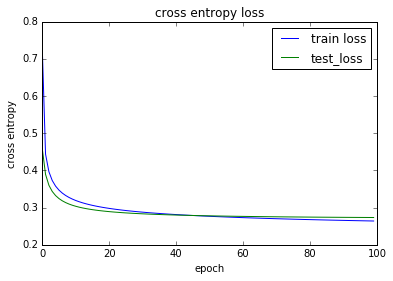

In [12]:
x = np.arange(100)
plt.plot(x, trn_loss_list)
plt.plot(x, test_loss_list)
plt.title("cross entropy loss")
plt.legend(["train loss", "test_loss"])
plt.xlabel("epoch")
plt.ylabel("cross entropy")